<a href="https://colab.research.google.com/github/arnav39/d2el-en/blob/main/4_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.5 : Concise Implementation of Softmax Regression

In [1]:
!pip install matplotlib_inline
!pip install --upgrade d2l==1.0.0a0

In [2]:
import torch
import torch.nn as nn
from d2l import torch as d2l

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [3]:
from torch.nn import functional as F

In [4]:
def add_to_class(Class):
  def wrapper(obj):
    setattr(Class, obj.__name__, obj)
  return wrapper

In [ ]:
nn.Sequential??

In [6]:
nn.Flatten??

In [5]:
i = torch.randn(32, 1, 5, 5)
m = nn.Flatten() # default : firsta_dim = 1, last_dim = -1
o = m(i)
print(o.shape)

torch.Size([32, 25])


In [17]:
i = torch.randn(32, 1, 5, 5)
print(i.shape)
m = nn.Flatten(0, 2) # first dim to flatten and last dim to flatten
o = m(i)
print(o.shape)

torch.Size([32, 1, 5, 5])
torch.Size([160, 5])


In [29]:
class SoftmaxRegression(d2l.Classifier):
  def __init__(self, num_inputs, lr):
    super().__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(nn.Flatten(),
                             nn.LazyLinear(num_inputs))
    
  def forward(self, X):
    return self.net(X)

  def loss(self, y_hat, y, averaged=True):
    y_hat = y_hat.reshape(-1, y_hat.shape[-1])
    y = y.reshape(-1)
    return F.cross_entropy(y_hat, y, reduction='mean' if averaged else 'none')

In [18]:
a = torch.ones(10)
b = a.reshape(-1)
b.shape

torch.Size([10])

In [19]:
F.cross_entropy??

In [21]:
torch.randint??

In [26]:
for i in range(10):
  print(torch.randint(0, 5, (3, ), dtype=torch.int64))

tensor([2, 2, 2])
tensor([0, 0, 3])
tensor([2, 1, 0])
tensor([2, 1, 2])
tensor([4, 1, 3])
tensor([2, 4, 1])
tensor([0, 0, 4])
tensor([0, 3, 0])
tensor([3, 2, 4])
tensor([2, 1, 0])


In [27]:
input = torch.randn(3, 5, requires_grad=True) # no_of_samples x no_of_classes
target = torch.randint(5, (3,), dtype=torch.int64)
loss = F.cross_entropy(input, target)
loss

tensor(2.0617, grad_fn=<NllLossBackward0>)

In [ ]:
input.shape

torch.Size([3, 5])

In [ ]:
target.shape, target

(torch.Size([3]), tensor([4, 1, 3]))

In [30]:
@add_to_class(SoftmaxRegression)
def loss(self, y_hat, y, averaged=True):
  y_hat = y_hat.reshape(-1, y_hat.shape[-1])
  y = y.reshape(-1)
  return F.cross_entropy(y_hat, y, reduction='mean' if averaged else 'none') 

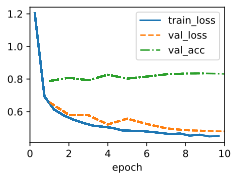

In [31]:
data = d2l.FashionMNIST(batch_size=256)
model = SoftmaxRegression(784, lr=0.1)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

## Ex 4.5

### Q3:

model might be overfitting. we should keep an optimal value of max_epochs

In [32]:
data = d2l.FashionMNIST(batch_size=256)
model = SoftmaxRegression(784, lr=0.1)
trainer = d2l.Trainer(max_epochs=100)
trainer.fit(model, data)